## Summary of the results

I have run 27 experiments, let's have a look

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from plot_utils import highlight_greaterthan, build_model_df, plot_loss, plot_emb
from pathlib import Path

In [36]:
DATA_PATH = Path("../datasets/Amazon/models/")
fname = "results_df.p"

In [37]:
df_results = pd.read_pickle(DATA_PATH/fname)

These are the results, highlighting the row with the maximum `best_hr` and `best_ndcg` values.

In [38]:
thresholds = [df_results.best_hr.max(), df_results.best_ndcg.max()]
columns = ['best_hr', 'best_ndcg']

In [39]:
(df_results
 .sort_values('modelname')
 .reset_index(drop=True)
 .style.apply(highlight_greaterthan, threshold=thresholds, column=columns, axis=1))

,modelname,iter_loss,best_hr,best_ndcg,best_iter,train_time
0,GMF_bs_1024_lr_0001_n_emb_8_lrnr_adam_lrs_wolrs.pt,0.271748,0.557995,0.346811,30,81.5565
1,GMF_bs_1024_lr_0005_n_emb_8_lrnr_adam_lrs_wolrs.pt,0.208753,0.685528,0.450089,28,81.6821
2,GMF_bs_1024_lr_001_n_emb_16_lrnr_adam_lrs_wolrs.pt,0.147244,0.686205,0.460785,30,84.9265
3,GMF_bs_1024_lr_001_n_emb_32_lrnr_adam_lrs_wolrs.pt,0.0956481,0.650702,0.435117,26,93.6193
4,GMF_bs_1024_lr_001_n_emb_64_lrnr_adam_lrs_wolrs.pt,0.054805,0.613295,0.406008,28,120.76
5,GMF_bs_1024_lr_001_n_emb_8_lrnr_adam_lrs_wlrs.pt,0.203959,0.695273,0.45934,30,84.5162
6,GMF_bs_1024_lr_001_n_emb_8_lrnr_adam_lrs_wolrs.pt,0.209589,0.696055,0.460012,28,88.3086
7,GMF_bs_1024_lr_001_n_emb_8_lrnr_adam_lrs_wolrs_loss_MSE.pt,0.0648755,0.682043,0.454177,20,81.5011
8,GMF_bs_512_lr_001_n_emb_8_lrnr_adam_lrs_wolrs_loss_MSE.pt,0.0663101,0.69065,0.451348,27,103.298
9,MLP_bs_1024_reg_00_lr_0001_n_emb_16_ll_8_dp_wodp_lrnr_adam_lrs_wolrs.pt,0.328461,0.55459,0.340501,22,90.4532


In [40]:
df_models = build_model_df(df_results)
df_models

,model,n_emb,modelname,iter_loss,best_hr,best_ndcg,best_iter,train_time
0,GMF,8,GMF_bs_1024_lr_001_n_emb_8_lrnr_adam_lrs_wolrs.pt,0.209589,0.696055,0.460012,28,88.308644
1,GMF,16,GMF_bs_1024_lr_001_n_emb_16_lrnr_adam_lrs_wolrs.pt,0.147244,0.686205,0.460785,30,84.926549
2,GMF,32,GMF_bs_1024_lr_001_n_emb_32_lrnr_adam_lrs_wolrs.pt,0.095648,0.650702,0.435117,26,93.619321
3,GMF,64,GMF_bs_1024_lr_001_n_emb_64_lrnr_adam_lrs_wolrs.pt,0.054805,0.613295,0.406008,28,120.759626
4,MLP,16,MLP_bs_1024_reg_00_lr_001_n_emb_16_ll_8_dp_wodp_lrnr_adam_lrs_wolrs.pt,0.197586,0.609697,0.396860,30,98.565004
5,MLP,32,MLP_bs_1024_reg_00_lr_003_n_emb_32_ll_16_dp_wodp_lrnr_adam_lrs_wolrs.pt,0.203978,0.637601,0.405437,30,95.000546
6,MLP,64,MLP_bs_1024_reg_00_lr_003_n_emb_64_ll_32_dp_wodp_lrnr_adam_lrs_wlrs.pt,0.205861,0.649072,0.435519,16,118.406985


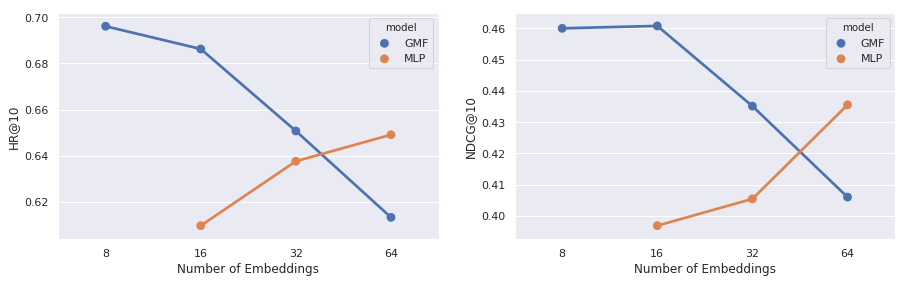

In [41]:
plot_emb(df_models)

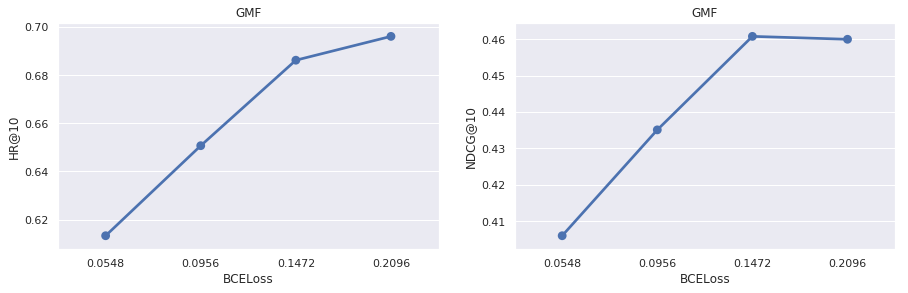

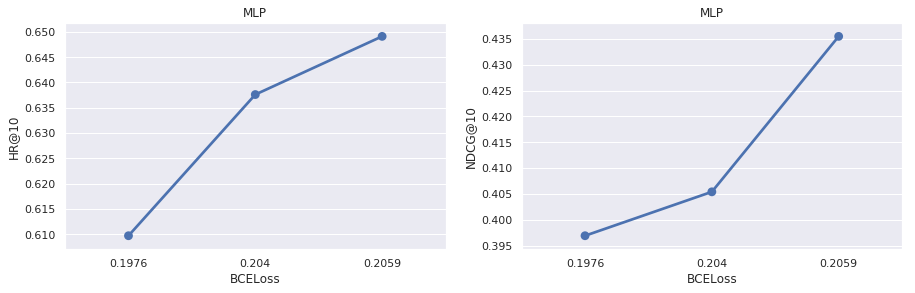

In [42]:
plot_loss(df_models)